In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

#import time
#start_time = time.time()
#model()
#print("--- %s seconds ---" % (time.time() - start_time))

In [2]:
apt_data = pd.read_csv('tree_v_forest_data.csv', encoding='latin-1') 

In [3]:
class_names_style = apt_data.Style.unique()

In [4]:
apt_data = apt_data.drop(['PropertyID'], axis=1)
apt_data.rename(columns={apt_data.columns[5]: 'rent_per_sf'},inplace=True)
apt_data.head()

,percent 1_Bed,percent 2_Bed,percent 3_Bed,percent 4_Bed,percent Studios,rent_per_sf,Avg Unit SF,Building Class,Near Transit,Leed,...,Parking Ratio,Parking Spaces/Unit,Rent Type,Star Rating,State,Style,Total Buildings,Vacancy percent,Year Built,IsRenovated
0,49.6,33.9,16.5,0.0,0.0,1.22,769,C,Yes,no,...,1.00,1,Market,2 Star,TX,Garden,4,9.57,1965,No
1,19.8,59.9,20.3,0.0,0.0,1.23,900,C,Yes,no,...,1.82,1,Market/Affordable,2 Star,TX,Garden,64,11.21,1968,No
2,27.6,58.6,13.8,0.0,0.0,1.33,889,B,Yes,no,...,2.00,1,Market,3 Star,TX,Garden,14,8.19,1968,Yes
3,64.7,30.2,3.4,0.0,1.7,1.00,888,C,No,no,...,1.25,0,Market,2 Star,TX,Garden,35,8.09,1969,No
4,13.9,73.0,13.0,0.0,0.0,1.15,851,C,No,no,...,1.95,1,Market,2 Star,TX,Garden,19,5.65,1969,No


In [5]:
rent = pd.DataFrame()
rent['rent_psf'] = apt_data['rent_per_sf']
rent_determ = apt_data.drop(['rent_per_sf'], axis=1)
rent_determ = pd.get_dummies(rent_determ)
rent.dtypes

rent_psf    float64
dtype: object

In [6]:
style = pd.DataFrame()
style['style'] = apt_data['Style']
style_determ = apt_data.drop(['Style'], axis=1)
style_determ = pd.get_dummies(style_determ)

In [7]:
style_determ.head()

,percent 1_Bed,percent 2_Bed,percent 3_Bed,percent 4_Bed,percent Studios,rent_per_sf,Avg Unit SF,Land Area (AC),Number Of Elevators,Number Of Parking Spaces,...,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,IsRenovated_No,IsRenovated_Yes
0,49.6,33.9,16.5,0.0,0.0,1.22,769,6.6140,0,275,...,0,0,1,0,0,0,0,0,1,0
1,19.8,59.9,20.3,0.0,0.0,1.23,900,13.2400,0,350,...,0,0,1,0,0,0,0,0,1,0
2,27.6,58.6,13.8,0.0,0.0,1.33,889,13.4384,0,400,...,0,0,1,0,0,0,0,0,0,1
3,64.7,30.2,3.4,0.0,1.7,1.00,888,4.9500,0,140,...,0,0,1,0,0,0,0,0,1,0
4,13.9,73.0,13.0,0.0,0.0,1.15,851,14.7559,0,380,...,0,0,1,0,0,0,0,0,1,0


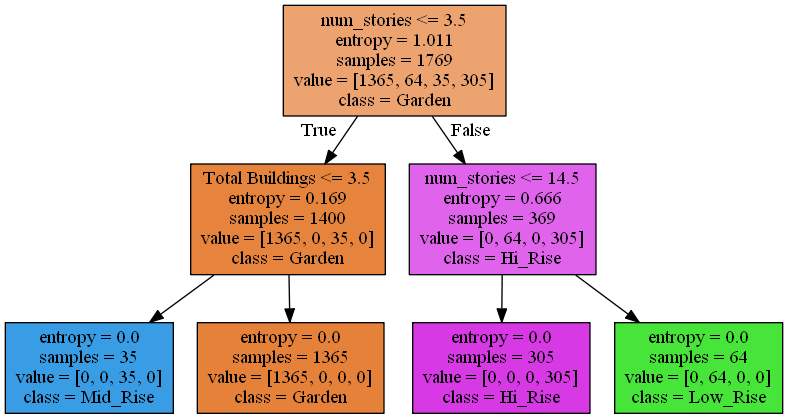

In [8]:
import time
start_time = time.time()



decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    #max_features = 3,
    max_depth = 3,
)
decision_tree.fit(style_determ, style)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names = style_determ.columns,
    class_names=class_names_style,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
import time
start_time = time.time()



decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    #max_features = 3,
    max_depth = 3,
)
decision_tree.fit(style_determ, style)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names = style_determ.columns,
    class_names=class_names_style,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.18651604652404785 seconds ---


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [11]:
X = style_determ
y = style['style']

rfc = ensemble.RandomForestClassifier()


cross_val_score(rfc, X, y, cv=10)

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

array([0.96089385, 0.91620112, 0.97206704, 0.96089385, 0.93258427,
       0.96      , 0.96      , 0.97714286, 0.96      , 0.96      ])

In [13]:

start_time = time.time()

X = style_determ
y = style['style']

rfc = ensemble.RandomForestClassifier()


cross_val_score(rfc, X, y, cv=10)


print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

--- 0.2098069190979004 seconds ---


In [12]:
style_det

NameError: name 'style_det' is not defined